In [3]:
import sys
sys.path.append('/Users/schoens/Documents/Projekte/Econ/Code/v3/')

import xarray as xr
import numpy as np
import pandas as pd
from pathlib import Path
import config.settings as cset

import matplotlib.pyplot as plt

In [4]:
scenario = 'Ref'
fair_ids_100   = pd.read_csv(cset.path_FAIR / 'ids_reconstructed.csv', sep = ',', index_col = 0).drop(columns = ['Ref']).rename(columns={'Ref_1p5': 'Ref'})
all_fair_runs  = pd.read_csv(cset.path_FAIR / f'scen_{scenario}.csv', index_col = 0).iloc[:, fair_ids_100.loc[:, scenario].values]
all_fair_runs.columns = np.arange(100)

In [5]:
# subsample FaIR 
all_fair_runs

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
year,,,,,,,,,,,,,,,,,,,,,
1850,0.0002,-0.0095,0.0293,-0.0239,-0.0023,0.0077,0.0198,0.0175,0.0347,-0.0149,...,0.0037,0.0390,0.0046,0.0055,0.0294,0.0182,0.0115,0.0164,0.0187,-0.0063
1851,0.0135,0.0022,0.0357,-0.0063,0.0058,0.0171,0.0298,0.0274,0.0437,-0.0073,...,0.0153,0.0475,0.0131,0.0167,0.0436,0.0279,0.0198,0.0279,0.0296,0.0080
1852,0.0239,0.0107,0.0395,0.0086,0.0118,0.0236,0.0373,0.0348,0.0494,-0.0016,...,0.0235,0.0539,0.0185,0.0248,0.0549,0.0348,0.0250,0.0364,0.0364,0.0193
1853,0.0223,0.0063,0.0270,0.0112,0.0074,0.0168,0.0333,0.0312,0.0395,-0.0037,...,0.0178,0.0473,0.0119,0.0187,0.0533,0.0297,0.0153,0.0311,0.0252,0.0180
1854,0.0094,-0.0089,0.0037,0.0019,-0.0048,-0.0006,0.0188,0.0173,0.0175,-0.0127,...,0.0002,0.0292,-0.0040,0.0011,0.0389,0.0139,-0.0047,0.0136,0.0009,0.0049
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2296,1.6554,1.2998,1.6183,2.0335,0.9679,1.5106,1.6276,1.5516,1.3996,1.4148,...,1.2489,1.8667,1.2100,1.2790,2.2578,1.4221,1.2626,1.4663,1.6991,1.4691
2297,1.6554,1.2998,1.6183,2.0335,0.9679,1.5106,1.6276,1.5516,1.3996,1.4148,...,1.2489,1.8667,1.2100,1.2790,2.2578,1.4221,1.2626,1.4663,1.6991,1.4691
2298,1.6554,1.2998,1.6183,2.0335,0.9679,1.5106,1.6276,1.5516,1.3996,1.4148,...,1.2489,1.8667,1.2100,1.2790,2.2578,1.4221,1.2626,1.4663,1.6991,1.4691


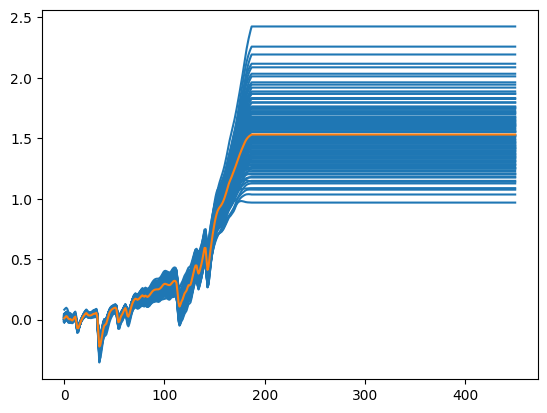

1.5307769999999996


In [6]:
plt.figure()
plt.plot(all_fair_runs.values, color=  'C0')
plt.plot(all_fair_runs.values.mean(axis = 1), color = 'C1')
plt.show()
print(all_fair_runs.values.mean(axis = 1)[-1])

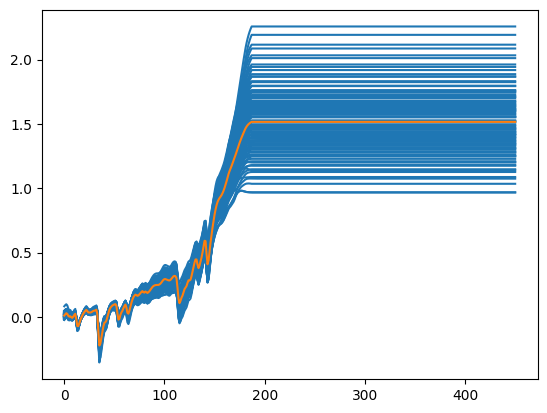

1.5162119999999992


In [7]:
# use trajectory with lowest values twice and throw out trajectory with highest values: 
idx_max = all_fair_runs.iloc[-1,:].idxmax()
idx_min = all_fair_runs.iloc[-1,:].idxmin()
gmt_adj = all_fair_runs.copy()
gmt_adj.iloc[:, idx_max] = gmt_adj.iloc[:, idx_min].copy()

plt.figure()
plt.plot(gmt_adj.values, color=  'C0')
plt.plot(gmt_adj.values.mean(axis = 1), color = 'C1')
plt.show()
print(gmt_adj.values.mean(axis = 1)[-1])

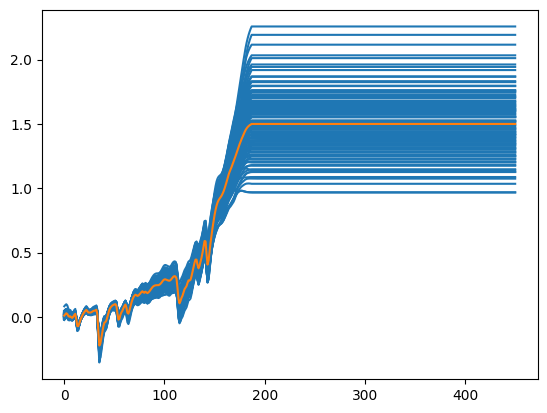

1.5000269999999996


In [8]:
# throw 4th highest out and replace with 2nd lowest
# use trajectory with lowest values twice and throw out trajectory with highest values: 
idx_max = gmt_adj.iloc[-1,:].values.argsort()[-4]
idx_max2 = gmt_adj.iloc[-1,:].values.argsort()[-10]
idx_min = gmt_adj.iloc[-1,:].values.argsort()[5]
idx_min2 = gmt_adj.iloc[-1,:].values.argsort()[13]
gmt_adj_double = gmt_adj.copy()
gmt_adj_double.iloc[:, idx_max] = gmt_adj_double.iloc[:, idx_min].copy()
gmt_adj_double.iloc[:, idx_max2] = gmt_adj_double.iloc[:, idx_min2].copy()

plt.figure()
plt.plot(gmt_adj_double.values, color=  'C0')
plt.plot(gmt_adj_double.values.mean(axis = 1), color = 'C1')
plt.show()
print(gmt_adj_double.values.mean(axis = 1)[-1])

In [9]:
# --> replacing model runs: 
mesmer_ids = xr.load_dataset(cset.path_MESMER_fldmean / f'{scenario}_fldmean.nc')['fair_esm_variability_realisation'].values
fair_ids_mesmer = np.array([f.split('_')[0] for f in mesmer_ids])
model_ids_mesmer = np.array([f.split('_')[1] for f in mesmer_ids])
var_ids_mesmer = np.array([f.split('_')[2] for f in mesmer_ids])

In [10]:
new_fair_ids_mesmer = np.copy(fair_ids_mesmer)
new_fair_ids_mesmer[new_fair_ids_mesmer == '64'] = '90'
new_fair_ids_mesmer[new_fair_ids_mesmer == '94'] = '84'
# new_fair_ids_mesmer[new_fair_ids_mesmer == '56'] = '28'

mesmer_ids_new = [new_fair_ids_mesmer[i] + '_' + model_ids_mesmer[i] + '_' + var_ids_mesmer[i] for i in range(len(mesmer_ids))]

In [158]:
np.save('/Users/schoens/Documents/Projekte/Econ/Data/MESMER/mesmer_ids/new_ref_ids.npy', mesmer_ids_new)

In [11]:
mesmer_ids

array(['0_AWI-CM-1-1-MR_210', '10_CNRM-CM6-1-HR_718',
       '10_HadGEM3-GC31-LL_664', '10_HadGEM3-GC31-MM_364',
       '11_FIO-ESM-2-0_361', '13_NorESM2-LM_431', '14_AWI-CM-1-1-MR_838',
       '14_CNRM-ESM2-1_279', '14_HadGEM3-GC31-MM_960',
       '14_IPSL-CM6A-LR_855', '14_UKESM1-0-LL_737', '15_CNRM-ESM2-1_268',
       '16_E3SM-1-1_259', '19_MPI-ESM1-2-HR_87', '19_NorESM2-LM_551',
       '20_CNRM-CM6-1-HR_338', '20_MPI-ESM1-2-HR_859',
       '22_MRI-ESM2-0_474', '23_ACCESS-CM2_597', '23_MPI-ESM1-2-LR_744',
       '26_CNRM-CM6-1-HR_742', '26_NorESM2-LM_933', '27_E3SM-1-1_763',
       '27_FIO-ESM-2-0_297', '27_NESM3_364', '28_NESM3_203',
       '29_MRI-ESM2-0_960', '2_MPI-ESM1-2-HR_783', '2_MRI-ESM2-0_755',
       '30_ACCESS-ESM1-5_208', '30_FGOALS-f3-L_946',
       '32_MPI-ESM1-2-LR_471', '33_CNRM-CM6-1_181', '33_E3SM-1-1_868',
       '34_FGOALS-g3_509', '34_IPSL-CM6A-LR_124', '35_CNRM-ESM2-1_431',
       '37_CNRM-CM6-1_847', '37_NESM3_263', '38_FGOALS-g3_511',
       '38_MRI-ESM2-0_1

In [160]:
mesmer_ids_new

['0_AWI-CM-1-1-MR_210',
 '10_CNRM-CM6-1-HR_718',
 '10_HadGEM3-GC31-LL_664',
 '10_HadGEM3-GC31-MM_364',
 '11_FIO-ESM-2-0_361',
 '13_NorESM2-LM_431',
 '14_AWI-CM-1-1-MR_838',
 '14_CNRM-ESM2-1_279',
 '14_HadGEM3-GC31-MM_960',
 '14_IPSL-CM6A-LR_855',
 '14_UKESM1-0-LL_737',
 '15_CNRM-ESM2-1_268',
 '16_E3SM-1-1_259',
 '19_MPI-ESM1-2-HR_87',
 '19_NorESM2-LM_551',
 '20_CNRM-CM6-1-HR_338',
 '20_MPI-ESM1-2-HR_859',
 '22_MRI-ESM2-0_474',
 '23_ACCESS-CM2_597',
 '23_MPI-ESM1-2-LR_744',
 '26_CNRM-CM6-1-HR_742',
 '26_NorESM2-LM_933',
 '27_E3SM-1-1_763',
 '27_FIO-ESM-2-0_297',
 '27_NESM3_364',
 '28_NESM3_203',
 '29_MRI-ESM2-0_960',
 '2_MPI-ESM1-2-HR_783',
 '2_MRI-ESM2-0_755',
 '30_ACCESS-ESM1-5_208',
 '30_FGOALS-f3-L_946',
 '32_MPI-ESM1-2-LR_471',
 '33_CNRM-CM6-1_181',
 '33_E3SM-1-1_868',
 '34_FGOALS-g3_509',
 '34_IPSL-CM6A-LR_124',
 '35_CNRM-ESM2-1_431',
 '37_CNRM-CM6-1_847',
 '37_NESM3_263',
 '38_FGOALS-g3_511',
 '38_MRI-ESM2-0_10',
 '3_ACCESS-CM2_732',
 '3_ACCESS-ESM1-5_960',
 '3_CESM2-WACCM_573',


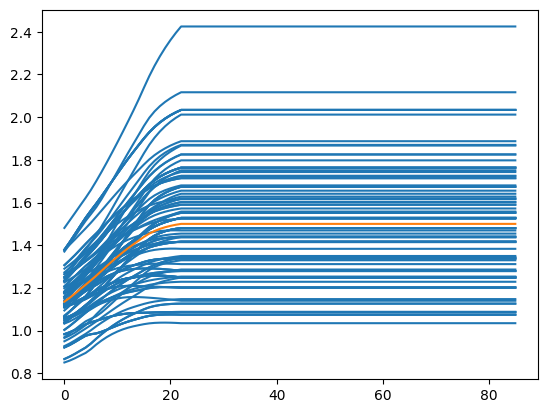

1.4998879999999997


In [12]:
fair_ids   = [int(f.split('_')[0]) for f in mesmer_ids_new]

selected_fair_runs = all_fair_runs.loc[slice(2015,2100), np.array(fair_ids)]
plt.figure()
plt.plot(selected_fair_runs.values, color=  'C0')
plt.plot(selected_fair_runs.values.mean(axis = 1), color = 'C1')
plt.show()
print(selected_fair_runs.values.mean(axis = 1)[-1])

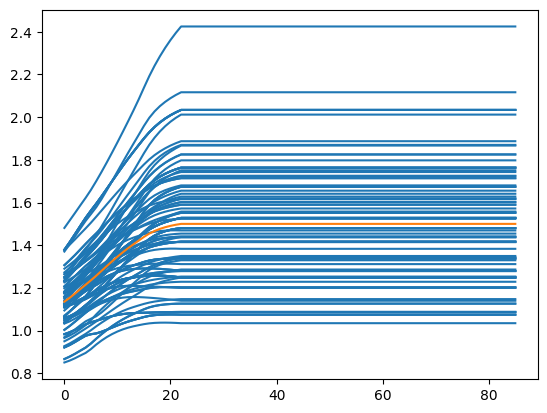

1.4998880000000006


In [159]:
mesmer_ids = np.load('/Users/schoens/Documents/Projekte/Econ/Data/MESMER/mesmer_ids/new_ref_ids.npy')
fair_ids   = [int(f.split('_')[0]) for f in mesmer_ids]

selected_fair_runs = all_fair_runs.loc[slice(2015,2100), np.array(fair_ids)]
plt.figure()
plt.plot(selected_fair_runs.values, color=  'C0')
plt.plot(selected_fair_runs.values.mean(axis = 1), color = 'C1')
plt.show()
print(selected_fair_runs.values.mean(axis = 1)[-1])

In [99]:
mesmer_ids_new

['0_AWI-CM-1-1-MR_210',
 '10_CNRM-CM6-1-HR_718',
 '10_HadGEM3-GC31-LL_664',
 '10_HadGEM3-GC31-MM_364',
 '11_FIO-ESM-2-0_361',
 '13_NorESM2-LM_431',
 '14_AWI-CM-1-1-MR_838',
 '14_CNRM-ESM2-1_279',
 '14_HadGEM3-GC31-MM_960',
 '14_IPSL-CM6A-LR_855',
 '14_UKESM1-0-LL_737',
 '15_CNRM-ESM2-1_268',
 '16_E3SM-1-1_259',
 '19_MPI-ESM1-2-HR_87',
 '19_NorESM2-LM_551',
 '20_CNRM-CM6-1-HR_338',
 '20_MPI-ESM1-2-HR_859',
 '22_MRI-ESM2-0_474',
 '23_ACCESS-CM2_597',
 '23_MPI-ESM1-2-LR_744',
 '26_CNRM-CM6-1-HR_742',
 '26_NorESM2-LM_933',
 '27_E3SM-1-1_763',
 '27_FIO-ESM-2-0_297',
 '27_NESM3_364',
 '28_NESM3_203',
 '29_MRI-ESM2-0_960',
 '2_MPI-ESM1-2-HR_783',
 '2_MRI-ESM2-0_755',
 '30_ACCESS-ESM1-5_208',
 '30_FGOALS-f3-L_846',
 '32_MPI-ESM1-2-LR_471',
 '33_CNRM-CM6-1_181',
 '33_E3SM-1-1_868',
 '34_FGOALS-g3_509',
 '34_IPSL-CM6A-LR_124',
 '35_CNRM-ESM2-1_431',
 '37_CNRM-CM6-1_847',
 '37_NESM3_263',
 '38_FGOALS-g3_511',
 '38_MRI-ESM2-0_10',
 '3_ACCESS-CM2_732',
 '3_ACCESS-ESM1-5_960',
 '3_CESM2-WACCM_573',


In [ ]:
selected_fair_runs_adj.iloc[:, np.argwhere(selected_fair_runs_adj.columns == 64).flatten()[0]] = all_fair_runs.loc[slice(2015,2100), 37]
selected_fair_runs_adj.iloc[:, np.argwhere(selected_fair_runs_adj.columns == 64).flatten()[1]] = all_fair_runs.loc[slice(2015,2100), 37]
# selected_fair_runs_adj.iloc[:, np.argwhere(selected_fair_runs_adj.columns == 56).flatten()[0]] = all_fair_runs.loc[slice(2015,2100), 28]
selected_fair_runs_adj.iloc[:, np.argwhere(selected_fair_runs_adj.columns == 94).flatten()[0]] = all_fair_runs.loc[slice(2015,2100), 84]
selected_fair_runs_adj.iloc[:, np.argwhere(selected_fair_runs_adj.columns == 94).flatten()[1]] = all_fair_runs.loc[slice(2015,2100), 84]
selected_fair_runs_adj.iloc[:, np.argwhere(selected_fair_runs_adj.columns == 94).flatten()[2]] = all_fair_runs.loc[slice(2015,2100), 84]

In [97]:
mesmer_ids

array(['0_AWI-CM-1-1-MR_210', '10_CNRM-CM6-1-HR_718',
       '10_HadGEM3-GC31-LL_664', '10_HadGEM3-GC31-MM_364',
       '11_FIO-ESM-2-0_361', '13_NorESM2-LM_431', '14_AWI-CM-1-1-MR_838',
       '14_CNRM-ESM2-1_279', '14_HadGEM3-GC31-MM_960',
       '14_IPSL-CM6A-LR_855', '14_UKESM1-0-LL_737', '15_CNRM-ESM2-1_268',
       '16_E3SM-1-1_259', '19_MPI-ESM1-2-HR_87', '19_NorESM2-LM_551',
       '20_CNRM-CM6-1-HR_338', '20_MPI-ESM1-2-HR_859',
       '22_MRI-ESM2-0_474', '23_ACCESS-CM2_597', '23_MPI-ESM1-2-LR_744',
       '26_CNRM-CM6-1-HR_742', '26_NorESM2-LM_933', '27_E3SM-1-1_763',
       '27_FIO-ESM-2-0_297', '27_NESM3_364', '28_NESM3_203',
       '29_MRI-ESM2-0_960', '2_MPI-ESM1-2-HR_783', '2_MRI-ESM2-0_755',
       '30_ACCESS-ESM1-5_208', '30_FGOALS-f3-L_946',
       '32_MPI-ESM1-2-LR_471', '33_CNRM-CM6-1_181', '33_E3SM-1-1_868',
       '34_FGOALS-g3_509', '34_IPSL-CM6A-LR_124', '35_CNRM-ESM2-1_431',
       '37_CNRM-CM6-1_847', '37_NESM3_263', '38_FGOALS-g3_511',
       '38_MRI-ESM2-0_1

In [56]:
selected_fair_runs = all_fair_runs.loc[slice(2015,2100), np.array(fair_ids_mesmer)]

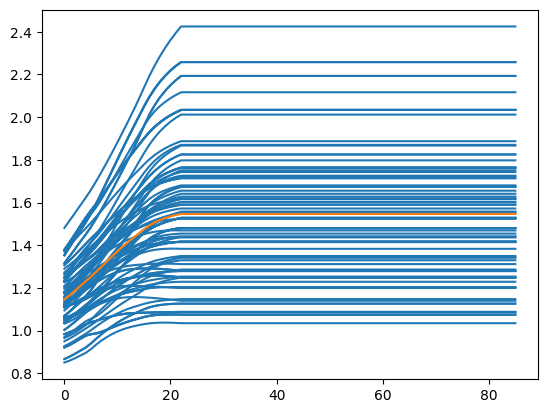

1.5463700000000002


In [59]:
plt.figure()
plt.plot(selected_fair_runs.values, color=  'C0')
plt.plot(selected_fair_runs.values.mean(axis = 1), color = 'C1')
plt.show()
print(selected_fair_runs.values.mean(axis = 1)[-1])

In [89]:
np.argwhere(selected_fair_runs_adj.columns == 94).flatten()

array([94, 95, 96])

In [90]:
np.argwhere(selected_fair_runs_adj.columns == 56).flatten()

array([54])

In [95]:
selected_fair_runs_adj = selected_fair_runs.copy()
# selected_fair_runs_adj.iloc[:, np.argwhere(selected_fair_runs_adj.columns == 11).flatten()[0]] = all_fair_runs.loc[slice(2015,2100), 4]
selected_fair_runs_adj.iloc[:, np.argwhere(selected_fair_runs_adj.columns == 64).flatten()[0]] = all_fair_runs.loc[slice(2015,2100), 37]
selected_fair_runs_adj.iloc[:, np.argwhere(selected_fair_runs_adj.columns == 64).flatten()[1]] = all_fair_runs.loc[slice(2015,2100), 37]
# selected_fair_runs_adj.iloc[:, np.argwhere(selected_fair_runs_adj.columns == 56).flatten()[0]] = all_fair_runs.loc[slice(2015,2100), 28]
selected_fair_runs_adj.iloc[:, np.argwhere(selected_fair_runs_adj.columns == 94).flatten()[0]] = all_fair_runs.loc[slice(2015,2100), 84]
selected_fair_runs_adj.iloc[:, np.argwhere(selected_fair_runs_adj.columns == 94).flatten()[1]] = all_fair_runs.loc[slice(2015,2100), 84]
selected_fair_runs_adj.iloc[:, np.argwhere(selected_fair_runs_adj.columns == 94).flatten()[2]] = all_fair_runs.loc[slice(2015,2100), 84]

# 64 --> 37
# 94 --> 84
# 

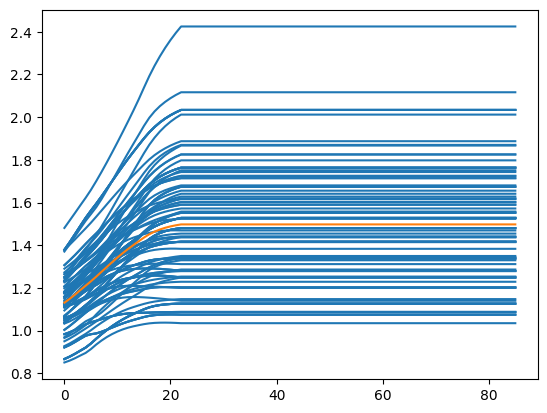

1.4974380000000005


In [96]:
plt.figure()
plt.plot(selected_fair_runs_adj.values, color=  'C0')
plt.plot(selected_fair_runs_adj.values.mean(axis = 1), color = 'C1')
plt.show()
print(selected_fair_runs_adj.values.mean(axis = 1)[-1])

In [155]:
print(all_fair_runs.iloc[-1,:].idxmax(), gmt_adj.iloc[-1,:].values.argsort()[-2], gmt_adj.iloc[-1,:].values.argsort()[-10], all_fair_runs.iloc[-1,:].values.argsort()[-2]) 
print(all_fair_runs.iloc[-1,:].idxmin(), gmt_adj.iloc[-1,:].values.argsort()[15], gmt_adj.iloc[-1,:].values.argsort()[14], all_fair_runs.iloc[-1,:].values.argsort()[25])

11 64 56 94
4 90 77 84


In [136]:
print(all_fair_runs.iloc[-1,:].idxmax(), gmt_adj.iloc[-1,:].values.argsort()[-2], gmt_adj.iloc[-1,:].values.argsort()[-10], all_fair_runs.iloc[-1,:].values.argsort()[-2]) 
print(all_fair_runs.iloc[-1,:].idxmin(), gmt_adj.iloc[-1,:].values.argsort()[5], gmt_adj.iloc[-1,:].values.argsort()[14], all_fair_runs.iloc[-1,:].values.argsort()[25])

11 64 56 94
4 37 77 84


In [85]:
all_fair_runs.iloc[-1,:].values.argsort()[-2]

94

In [87]:
all_fair_runs.iloc[-1,:].values.argsort()[25]

84

In [86]:
np.argwhere(np.array(fair_ids_mesmer) == 94)

array([[94],
       [95],
       [96]])

In [34]:
mesmer_ids

array(['0_AWI-CM-1-1-MR_210', '10_CNRM-CM6-1-HR_718',
       '10_HadGEM3-GC31-LL_664', '10_HadGEM3-GC31-MM_364',
       '11_FIO-ESM-2-0_361', '13_NorESM2-LM_431', '14_AWI-CM-1-1-MR_838',
       '14_CNRM-ESM2-1_279', '14_HadGEM3-GC31-MM_960',
       '14_IPSL-CM6A-LR_855', '14_UKESM1-0-LL_737', '15_CNRM-ESM2-1_268',
       '16_E3SM-1-1_259', '19_MPI-ESM1-2-HR_87', '19_NorESM2-LM_551',
       '20_CNRM-CM6-1-HR_338', '20_MPI-ESM1-2-HR_859',
       '22_MRI-ESM2-0_474', '23_ACCESS-CM2_597', '23_MPI-ESM1-2-LR_744',
       '26_CNRM-CM6-1-HR_742', '26_NorESM2-LM_933', '27_E3SM-1-1_763',
       '27_FIO-ESM-2-0_297', '27_NESM3_364', '28_NESM3_203',
       '29_MRI-ESM2-0_960', '2_MPI-ESM1-2-HR_783', '2_MRI-ESM2-0_755',
       '30_ACCESS-ESM1-5_208', '30_FGOALS-f3-L_946',
       '32_MPI-ESM1-2-LR_471', '33_CNRM-CM6-1_181', '33_E3SM-1-1_868',
       '34_FGOALS-g3_509', '34_IPSL-CM6A-LR_124', '35_CNRM-ESM2-1_431',
       '37_CNRM-CM6-1_847', '37_NESM3_263', '38_FGOALS-g3_511',
       '38_MRI-ESM2-0_1

In [45]:
fair_ids_mesmer

[0,
 10,
 10,
 10,
 11,
 13,
 14,
 14,
 14,
 14,
 14,
 15,
 16,
 19,
 19,
 20,
 20,
 22,
 23,
 23,
 26,
 26,
 27,
 27,
 27,
 28,
 29,
 2,
 2,
 30,
 30,
 32,
 33,
 33,
 34,
 34,
 35,
 37,
 37,
 38,
 38,
 3,
 3,
 3,
 3,
 41,
 44,
 46,
 47,
 48,
 50,
 52,
 53,
 54,
 56,
 57,
 58,
 58,
 63,
 64,
 64,
 65,
 67,
 67,
 67,
 67,
 6,
 70,
 71,
 72,
 73,
 73,
 77,
 78,
 78,
 78,
 7,
 7,
 82,
 83,
 85,
 87,
 87,
 87,
 87,
 89,
 89,
 89,
 90,
 90,
 90,
 91,
 93,
 93,
 94,
 94,
 94,
 99,
 9,
 9]

In [165]:
# testing new ref scenario 


fair_ids_100  = pd.read_csv(cset.path_FAIR / 'ids_reconstructed.csv', sep = ',', index_col = 0).drop(columns = ['Ref']).rename(columns={'Ref_1p5': 'Ref'})

scenario = 'Ref'
all_fair_runs = pd.read_csv(cset.path_FAIR / f'scen_{scenario}.csv', index_col = 0).iloc[:, fair_ids_100.loc[:, scenario].values]
all_fair_runs.columns = np.arange(100)
mesmer_ids = xr.load_dataset('/Users/schoens/Documents/Projekte/Econ/Data/MESMER/mesmer_ids/Refv2.nc')['fair_esm_variability_realisation'].values
fair_ids_mesmer = [int(f.split('_')[0]) for f in mesmer_ids]
gmt = all_fair_runs.loc[slice(2015,2100), fair_ids_mesmer].T


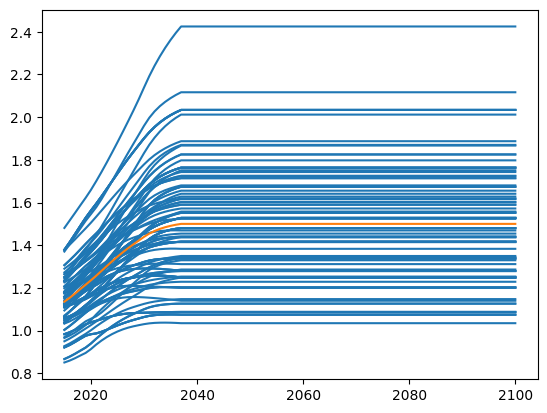

1.4998879999999997


In [167]:
plt.figure()
plt.plot(gmt.T, color = 'C0')
plt.plot(gmt.mean(axis = 0), color  = 'C1')
plt.show()
print(gmt.mean(axis = 0).values[-1])